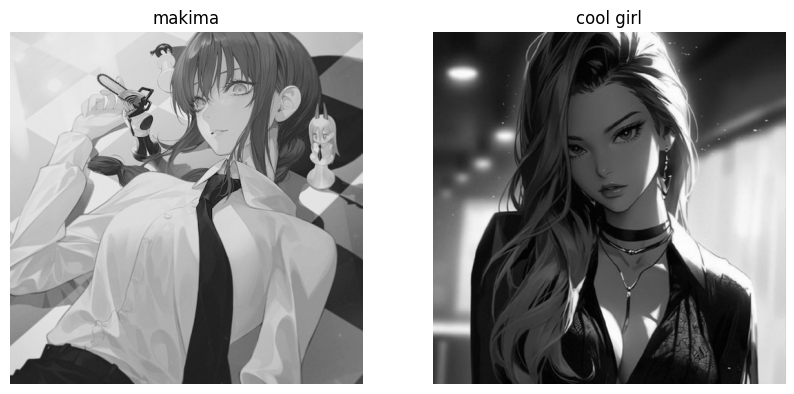

In [5]:
import utils as ut

imgs_folder = "imgs/"
img1_name = imgs_folder + "girl1.jpg"
img2_name = imgs_folder + "girl2.jpg"

default_size = (512, 512)

img1 = ut.load_image(img1_name, default_size)
img2 = ut.load_image(img2_name, default_size)

ut.show_images((img1, "makima"), (img2, "cool girl"))


--- EMBEDDING ---
blocks: 1
chars: 0
blocks:
 28.000000  59.000000  35.000000  74.000000   
 77.000000  130.000000  79.000000  244.000000   
 59.000000  55.000000  102.000000  40.000000   
 184.000000  133.000000  221.000000  11.000000   

for block[0, 0]:
	transformed:
	 382.750000 -13.751820  4.577292  29.717398 
	-87.765571 -104.749879  22.789883 -128.884310 
	 100.139665 -89.367793  4.102561 -93.701197 
	-85.643972 -30.324368 -1.798829 -11.102597 

	bit = 1
	mf1, mf2 = -3.674591, 4.674591
	mHL  - mLH  | t  =>  -17.949934 - -26.299117 = 8.349183 | 1
	mHLn - mLHn | t  =>  -17.949934 - -26.299117 = 8.349183 | 1

	embedded_block - transformed
	 0.000000  0.000000  0.000000  0.000000 
	 0.000000  0.000000  0.000000  0.000000 
	 0.000000  0.000000  0.000000  0.000000 
	 0.000000  0.000000  0.000000  0.000000 

	result - block
	 0.000188  0.000065  0.000169 -0.000031 
	 0.000083 -0.000153 -0.000023 -0.000114 
	 0.000018  0.000074  0.000060  0.000068 
	-0.000315  0.000031 -0.000193  0.0000

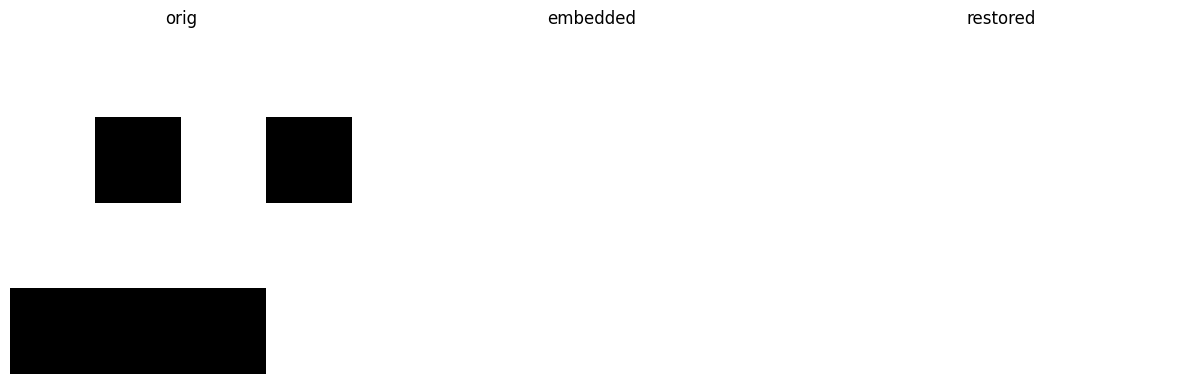

t               : 1.000000
block size      : 4
changed         : 0
PNSR            : -41.28
error function  : 0.5155185465556397

image size      : 4x4 = 16
message len     : 1 bits
total image cap : 1 bits (blocks)
side info size  : 0 bits (int8, float64)
bits overcap    : 0.00x

restored_img    : False (max_diff = 0.0006293778)
restored_mess   : True (1/1 = 100.0%)
time embedding  : 0.002s
time extracting : 0.001s
time total      : 0.003s



In [ ]:
import utils as ut
import embedding as em
import importlib
importlib.reload(ut)
importlib.reload(em)

t = 1
block_size = 4
debug = False
show = True
# orig = ut.load_image("imgs/girl2.jpg")
orig = ut.gen_test(4)
ut.pmat(orig)
mess = ut.gen_mess((orig.shape[0] // block_size) ** 2)

process_params = em.ProcessParams()
process_params.debug = True
process_params.show = True

stats = em.process(orig, mess, t, block_size, process_params)

In [ ]:
import utils as ut
import embedding as em

t = 0.01
debug = False
show = False
orig = ut.load_image("imgs/girl2.jpg", (512, 512))

for i in range(2, 10):
    block_size = 2 ** i
    mess = ut.gen_mess((orig.shape[0] // block_size) ** 2)
    stats = em.process(orig, mess, t, block_size, debug=debug, show=show)
    print(stats)

In [ ]:
import utils as ut
import embedding as em
import importlib
import numpy as np
importlib.reload(ut)
importlib.reload(em)

t = 0.1
block_size = 4
debug = False
show = True
orig = ut.gen_test(8)
ut.pmat(orig)
mess = ut.gen_mess((orig.shape[0] // block_size) ** 2)

process_params = em.ProcessParams()
process_params.debug = True
process_params.show = True

stats = em.process(orig, mess, t, block_size, process_params)

Progress: |██████████████████████████████████████████████████| 100.0% Complete
best: source(1) trail(20)  error(1.372093023255814) pred(0.000000)       t(0.000001) b_size(16)



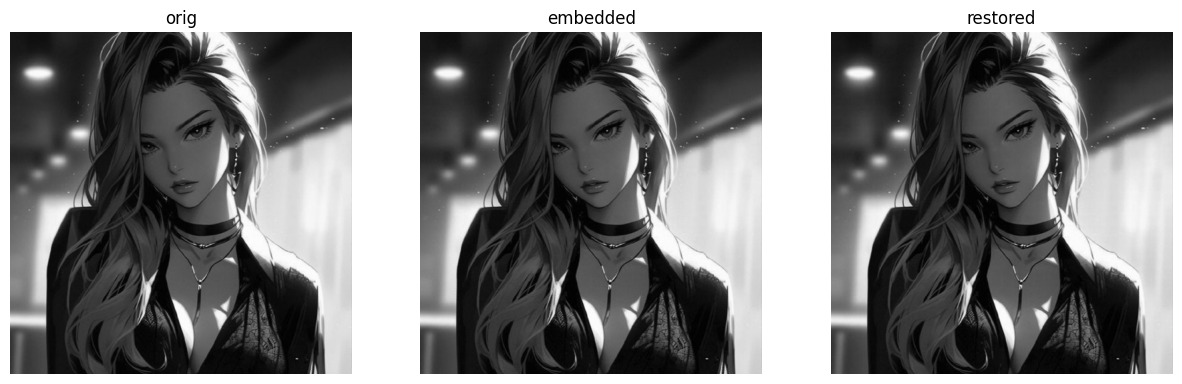

t               : 0.000001
block size      : 16
changed         : 521
PNSR            : 53.75
error function  : 1.372093023255814

image size      : 512x512 = 262144
message len     : 1024 bits
total image cap : 1024 bits (blocks)
side info size  : 75024 bits (int8, float64)
bits overcap    : 73.27x

restored_img    : True (max_diff = 0.0000040326)
restored_mess   : True (1024/1024 = 100.0%)
time embedding  : 0.110s
time extracting : 0.109s
time total      : 0.219s



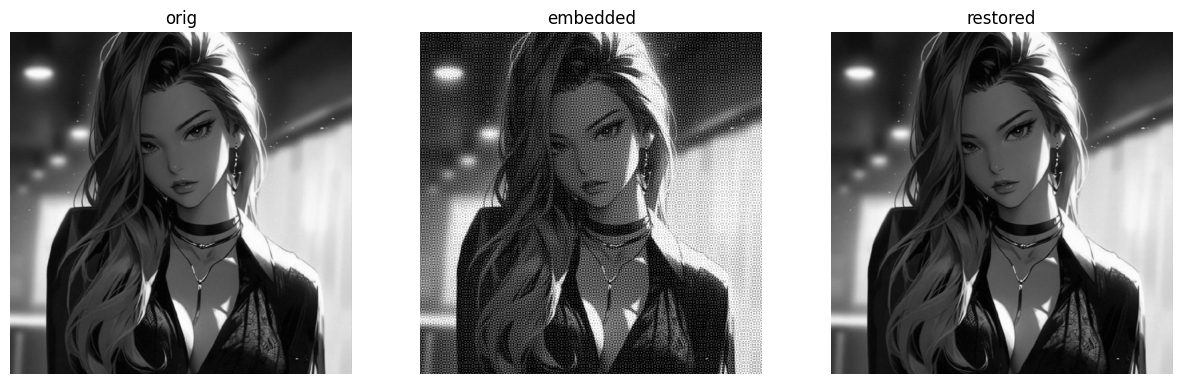

t               : 0.377249
block size      : 16
changed         : 1024
PNSR            : 18.44
error function  : 2.084745762711864

image size      : 512x512 = 262144
message len     : 1024 bits
total image cap : 1024 bits (blocks)
side info size  : 147456 bits (int8, float64)
bits overcap    : 144.00x

restored_img    : True (max_diff = 0.0000040968)
restored_mess   : True (1024/1024 = 100.0%)
time embedding  : 0.112s
time extracting : 0.111s
time total      : 0.223s


random - abc = 2.084745762711864 - 1.372093023255814 = 0.7126527394560502


In [88]:
import utils as ut
import embedding as em
import ABC
import importlib
importlib.reload(ut)
importlib.reload(em)
importlib.reload(ABC)

block_size = 16
# orig = ut.gen_test(64)
orig = ut.load_image("imgs/girl2.jpg")
# ut.pmat(orig)
mess = ut.gen_mess((orig.shape[0] // block_size) ** 2)

space = ABC.AbcSpace()
space.block_size = (block_size, block_size)

abc = ABC.Abc(orig, mess, space=space)

best_sol = abc.run()
rand = abc.run_random()

print(f'\nrandom - abc = {rand.error} - {best_sol.error} = {rand.error - best_sol.error}')